In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
number_classes = 10
wght_decay = 0.00005
x_shape = [32,32,3]
batch_size = 32
maxepoches = 30
learning_rate = 0.1
learning_decay = 1e-6
learning_drop = 20

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 2s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

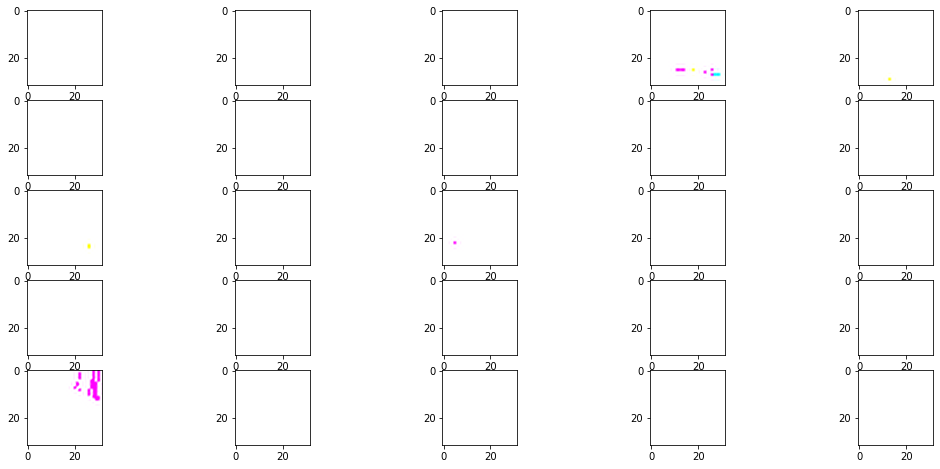

In [4]:
fig = plt.figure(figsize=(18, 8))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], interpolation='lanczos')

In [5]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [6]:
y_train = keras.utils.to_categorical(y_train, number_classes)
y_test = keras.utils.to_categorical(y_test, number_classes)

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [9]:
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        2

In [11]:
image_augm = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=12,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

In [17]:
image_augm.fit(x_train)
sgd = optimizers.SGD(lr=learning_rate, decay=learning_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [18]:
filepath="weights.VGGcifar.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [19]:
callbacks_list = [checkpoint]

In [20]:
trained_model = model.fit_generator(image_augm.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0]//batch_size,
                            epochs=maxepoches,
                            validation_data=(x_test, y_test),callbacks=callbacks_list,verbose=1)

Epoch 1/30
1561/1562 [============================>.] - ETA: 0s - loss: 19.6813 - accuracy: 0.1823
Epoch 00001: val_accuracy improved from -inf to 0.14630, saving model to weights.VGGcifar.hdf5
1562/1562 [==============================] - 56s 36ms/step - loss: 19.6815 - accuracy: 0.1823 - val_loss: 55.0811 - val_accuracy: 0.1463
Epoch 2/30
1561/1562 [============================>.] - ETA: 0s - loss: 17.3236 - accuracy: 0.2425
Epoch 00002: val_accuracy did not improve from 0.14630
1562/1562 [==============================] - 57s 36ms/step - loss: 17.3222 - accuracy: 0.2424 - val_loss: 31.7347 - val_accuracy: 0.0720
Epoch 3/30
1561/1562 [============================>.] - ETA: 0s - loss: 13.1981 - accuracy: 0.2790
Epoch 00003: val_accuracy improved from 0.14630 to 0.16770, saving model to weights.VGGcifar.hdf5
1562/1562 [==============================] - 57s 37ms/step - loss: 13.1972 - accuracy: 0.2790 - val_loss: 18.9803 - val_accuracy: 0.1677
Epoch 4/30
1561/1562 [======================

Text(0, 0.5, 'acc')

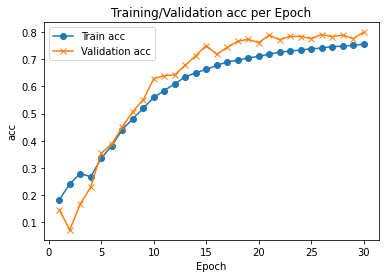

In [21]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + trained_model.history['accuracy'], 'o-')
ax.plot([None] + trained_model.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

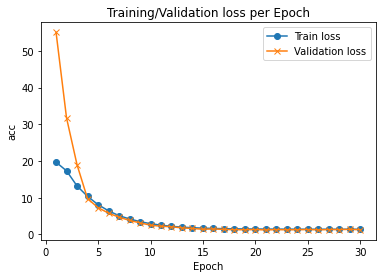

In [22]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + trained_model.history['loss'], 'o-')
ax.plot([None] + trained_model.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [23]:
predictions = trained_model.model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np

rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

8

In [25]:
cm = confusion_matrix(rounded_labels, np.argmax(predictions,axis=1))
cm

array([[781,   9,  31,  16,  22,   0,   0,  11,  55,  75],
       [  6, 823,   0,   0,   0,   0,   3,   1,  28, 139],
       [ 43,   1, 716,  78,  86,  10,  45,  11,   6,   4],
       [ 16,   2,  27, 725,  62,  25,  60,  22,  47,  14],
       [  7,   1,  25,  40, 884,   2,  29,   7,   4,   1],
       [  3,   5,  35, 268,  61, 533,  37,  31,  18,   9],
       [  7,   1,  29,  46,  20,   0, 882,   3,  10,   2],
       [ 11,   0,  12,  60, 100,   8,   9, 786,   6,   8],
       [ 34,   5,   9,   5,   2,   0,   4,   0, 922,  19],
       [  5,  17,   2,   5,   2,   0,   2,   0,  25, 942]])

In [26]:
def plot_confusion_matrix(cm):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()

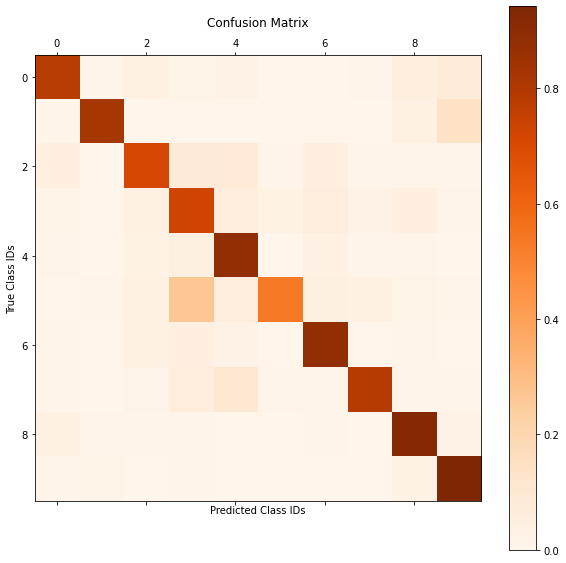

In [27]:
plot_confusion_matrix(cm)